<a href="https://colab.research.google.com/github/carolinalcv/predicciones-de-ventas/blob/main/predicciones_de_ventas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [171]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [172]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [173]:
df = pd.read_csv("/content/sales_predictions.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [174]:
df.shape

(8523, 12)

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [176]:
df.duplicated().sum()

0

In [177]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [178]:
#Hay dos columnas con datos faltantes: Item_Weight y Outlet_Size
#Con Item_Weight voy a imputar datos dada la información disponible. 
median_Item_Weight = df["Item_Weight"].median()
df["Item_Weight"].fillna(median_Item_Weight, inplace=True)
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [179]:
#Con Outlet_Size voy a eliminar la columna debido a que falta el 28% de datos y no es determinante para el análisis. 
df.drop(columns="Outlet_Size", inplace=True)
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [180]:
df = df.drop( columns= ["Item_Identifier","Outlet_Identifier"])
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,Tier 3,Supermarket Type1,994.7052


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Location_Type       8523 non-null   object 
 7   Outlet_Type                8523 non-null   object 
 8   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 599.4+ KB


In [182]:
#Encuentren y arreglen alguna categoría inconsistente de datos
df["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [183]:
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace("LF", "Low Fat")
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace("reg", "Regular")
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace("low fat", "Low Fat")
df["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [184]:
#Para cualquier columna numérica, obtengan las estadísticas resumidas para cada uno (mínimo, máximo y media)
df["Item_Outlet_Sales"].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Location_Type       8523 non-null   object 
 7   Outlet_Type                8523 non-null   object 
 8   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 599.4+ KB


In [186]:
df["Item_Outlet_Sales"] = df["Item_Outlet_Sales"].astype(int)

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Location_Type       8523 non-null   object 
 7   Outlet_Type                8523 non-null   object 
 8   Item_Outlet_Sales          8523 non-null   int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 599.4+ KB


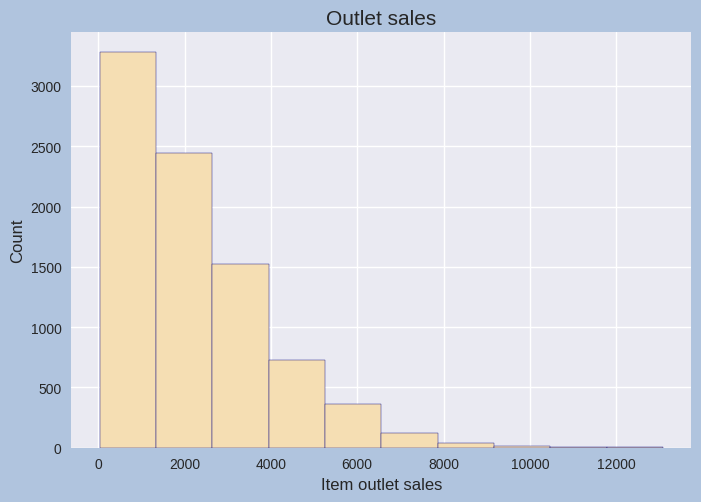

In [188]:
#Histograma para ver las distribuciones de diversas características en el conjunto de datos.
plt.figure(dpi=100, facecolor= "lightsteelblue" ) 
plt.style.use("seaborn")
plt.title("Outlet sales", fontsize = 15)
plt.xlabel("Item outlet sales", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
df["Item_Outlet_Sales"].hist(edgecolor="navy", color="wheat", label= "Outlet type")
plt.show()


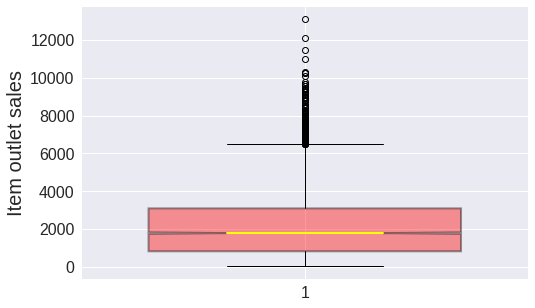

In [189]:
#Boxplot para ver resúmenes estadísticos de diversas características en el conjunto de datos.
item_outlet_sales = df["Item_Outlet_Sales"]
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5))
boxplots = axes.boxplot([item_outlet_sales],
           notch = True,          
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color="Yellow"),
           boxprops = dict(linestyle='--', linewidth=2, color="Black", facecolor = "blue", alpha = .4)
          );

boxplot1 = boxplots["boxes"][0]
boxplot1.set_facecolor("red")
plt.ylabel("Item outlet sales", fontsize = 20);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);

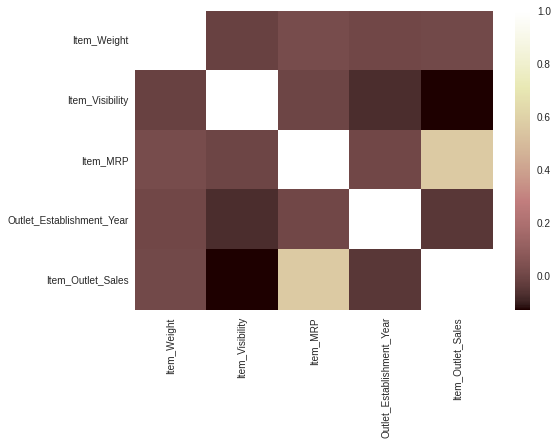

In [190]:
#Mapa de calor de la correlación entre las características.
corr = df.corr()
sns.heatmap(corr, cmap = "pink")

In [191]:
#Creen un mínimo de dos visualizaciones de datos para ayudar a otros comprender las tendencias en los datos (análisis de datos explicativos).

In [192]:
#visualización 1
#filtro las ventas por tipo de outlet
sales_filter = df.groupby(["Outlet_Type"])["Item_Outlet_Sales"].sum()
sales_filter

Outlet_Type
Grocery Store          367485
Supermarket Type1    12914551
Supermarket Type2     1851354
Supermarket Type3     3453454
Name: Item_Outlet_Sales, dtype: int64

In [193]:
#convierto la serie en dos arrays
unique_type = np.array(sales_filter.index)
unique_type



array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'], dtype=object)

In [194]:
unique_sales = np.array(sales_filter.values)
unique_sales

array([  367485, 12914551,  1851354,  3453454])

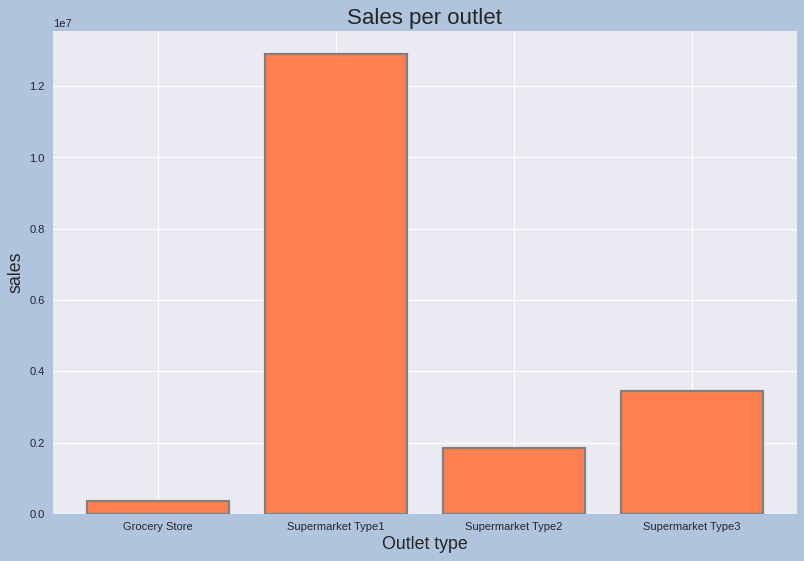

In [195]:
#Visualización de las ventas por tipo de tienda
plt.figure(dpi=80, facecolor= "lightsteelblue", figsize = (12, 8)) 
plt.bar(unique_type, unique_sales, color="coral", edgecolor="gray", linewidth=2)
plt.xlabel("Outlet type",fontsize=16,)
plt.ylabel("sales", fontsize=16)
plt.title("Sales per outlet",fontsize=20)
plt.show()

In [196]:
#visualización 2


In [197]:
#filtro las ventas por tipo de producto
sales2_filter = df.groupby(["Item_Type"])["Item_Outlet_Sales"].sum()
sales2_filter

Item_Type
Baking Goods             1265198
Breads                    553105
Breakfast                 232245
Canned                   1443824
Dairy                    1522268
Frozen Foods             1825296
Fruits and Vegetables    2819435
Hard Drinks               457685
Health and Hygiene       1044938
Household                2055033
Meat                      917356
Others                    325431
Seafood                   148832
Snack Foods              2732195
Soft Drinks               892670
Starchy Foods             351333
Name: Item_Outlet_Sales, dtype: int64

In [198]:
#convierto la serie en dos arrays
unique_item = np.array(sales2_filter.index)
unique_item

array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object)

In [199]:
unique_sales2 = np.array(sales2_filter.values)
unique_sales2

array([1265198,  553105,  232245, 1443824, 1522268, 1825296, 2819435,
        457685, 1044938, 2055033,  917356,  325431,  148832, 2732195,
        892670,  351333])

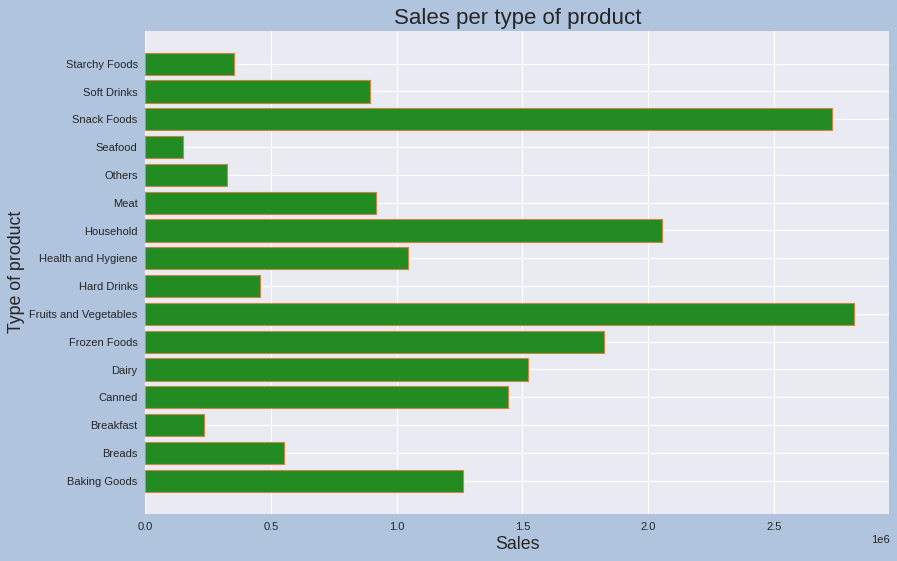

In [200]:
#Visualización de las ventas por tipo de de producto
plt.figure(dpi=80, facecolor= "lightsteelblue", figsize = (12, 8)) 
plt.barh(unique_item, unique_sales2, color="forestgreen", edgecolor="peru", linewidth=1)
plt.xlabel("Sales",fontsize=16,)
plt.ylabel("Type of product", fontsize=16)
plt.title("Sales per type of product",fontsize=20)
plt.show()

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Location_Type       8523 non-null   object 
 7   Outlet_Type                8523 non-null   object 
 8   Item_Outlet_Sales          8523 non-null   int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 599.4+ KB


In [143]:
df["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [211]:
df["Item_Fat_Content"].replace({"Low Fat":0, "Regular":1}, inplace=True)


In [148]:
df["Outlet_Location_Type"].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [209]:
df["Outlet_Location_Type"].replace({"Tier 1":0, "Tier 2":1, "Tier 3":2}, inplace=True)

In [202]:
Item_Type_ = df["Item_Type"]
Item_Type_ = pd.get_dummies(Item_Type_,prefix="item_type")
Item_Type_

,item_type_Baking Goods,item_type_Breads,item_type_Breakfast,item_type_Canned,item_type_Dairy,item_type_Frozen Foods,item_type_Fruits and Vegetables,item_type_Hard Drinks,item_type_Health and Hygiene,item_type_Household,item_type_Meat,item_type_Others,item_type_Seafood,item_type_Snack Foods,item_type_Soft Drinks,item_type_Starchy Foods
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8519,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8520,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8521,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [203]:
df = df.drop(columns="Item_Type")
df = pd.concat([Item_Type_,df], axis = 1)
df

,item_type_Baking Goods,item_type_Breads,item_type_Breakfast,item_type_Canned,item_type_Dairy,item_type_Frozen Foods,item_type_Fruits and Vegetables,item_type_Hard Drinks,item_type_Health and Hygiene,item_type_Household,...,item_type_Soft Drinks,item_type_Starchy Foods,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,0,0,0,1,0,0,0,0,0,...,0,0,9.300,Low Fat,0.016047,249.8092,1999,Tier 1,Supermarket Type1,3735
1,0,0,0,0,0,0,0,0,0,0,...,1,0,5.920,Regular,0.019278,48.2692,2009,Tier 3,Supermarket Type2,443
2,0,0,0,0,0,0,0,0,0,0,...,0,0,17.500,Low Fat,0.016760,141.6180,1999,Tier 1,Supermarket Type1,2097
3,0,0,0,0,0,0,1,0,0,0,...,0,0,19.200,Regular,0.000000,182.0950,1998,Tier 3,Grocery Store,732
4,0,0,0,0,0,0,0,0,0,1,...,0,0,8.930,Low Fat,0.000000,53.8614,1987,Tier 3,Supermarket Type1,994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0,0,0,0,0,0,0,0,0,0,...,0,0,6.865,Low Fat,0.056783,214.5218,1987,Tier 3,Supermarket Type1,2778
8519,1,0,0,0,0,0,0,0,0,0,...,0,0,8.380,Regular,0.046982,108.1570,2002,Tier 2,Supermarket Type1,549
8520,0,0,0,0,0,0,0,0,1,0,...,0,0,10.600,Low Fat,0.035186,85.1224,2004,Tier 2,Supermarket Type1,1193
8521,0,0,0,0,0,0,0,0,0,0,...,0,0,7.210,Regular,0.145221,103.1332,2009,Tier 3,Supermarket Type2,1845


In [204]:
Outlet_Type_ = df["Outlet_Type"]
Outlet_Type_ = pd.get_dummies(Outlet_Type_,prefix="outlet_type")
Outlet_Type_

,outlet_type_Grocery Store,outlet_type_Supermarket Type1,outlet_type_Supermarket Type2,outlet_type_Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0
...,...,...,...,...
8518,0,1,0,0
8519,0,1,0,0
8520,0,1,0,0
8521,0,0,1,0


In [205]:
df = df.drop(columns="Outlet_Type")
df = pd.concat([Outlet_Type_,df], axis = 1)
df

,outlet_type_Grocery Store,outlet_type_Supermarket Type1,outlet_type_Supermarket Type2,outlet_type_Supermarket Type3,item_type_Baking Goods,item_type_Breads,item_type_Breakfast,item_type_Canned,item_type_Dairy,item_type_Frozen Foods,...,item_type_Snack Foods,item_type_Soft Drinks,item_type_Starchy Foods,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Item_Outlet_Sales
0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,9.300,Low Fat,0.016047,249.8092,1999,Tier 1,3735
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,5.920,Regular,0.019278,48.2692,2009,Tier 3,443
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,17.500,Low Fat,0.016760,141.6180,1999,Tier 1,2097
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,19.200,Regular,0.000000,182.0950,1998,Tier 3,732
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,8.930,Low Fat,0.000000,53.8614,1987,Tier 3,994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0,1,0,0,0,0,0,0,0,0,...,1,0,0,6.865,Low Fat,0.056783,214.5218,1987,Tier 3,2778
8519,0,1,0,0,1,0,0,0,0,0,...,0,0,0,8.380,Regular,0.046982,108.1570,2002,Tier 2,549
8520,0,1,0,0,0,0,0,0,0,0,...,0,0,0,10.600,Low Fat,0.035186,85.1224,2004,Tier 2,1193
8521,0,0,1,0,0,0,0,0,0,0,...,1,0,0,7.210,Regular,0.145221,103.1332,2009,Tier 3,1845


In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   outlet_type_Grocery Store        8523 non-null   uint8  
 1   outlet_type_Supermarket Type1    8523 non-null   uint8  
 2   outlet_type_Supermarket Type2    8523 non-null   uint8  
 3   outlet_type_Supermarket Type3    8523 non-null   uint8  
 4   item_type_Baking Goods           8523 non-null   uint8  
 5   item_type_Breads                 8523 non-null   uint8  
 6   item_type_Breakfast              8523 non-null   uint8  
 7   item_type_Canned                 8523 non-null   uint8  
 8   item_type_Dairy                  8523 non-null   uint8  
 9   item_type_Frozen Foods           8523 non-null   uint8  
 10  item_type_Fruits and Vegetables  8523 non-null   uint8  
 11  item_type_Hard Drinks            8523 non-null   uint8  
 12  item_type_Health and

In [129]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn import set_config
set_config(display='diagram')

In [213]:
print(df.isna().sum().sum(), 'missing values')

0 missing values


In [214]:
df[df.isna().any(axis=1)].shape

(0, 27)

In [215]:

num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

num_columns = num_selector(df)
cat_columns = cat_selector(df)

print('numeric columns are', num_columns)
print('categorical columns are', cat_columns)

numeric columns are ['outlet_type_Grocery Store', 'outlet_type_Supermarket Type1', 'outlet_type_Supermarket Type2', 'outlet_type_Supermarket Type3', 'item_type_Baking Goods', 'item_type_Breads', 'item_type_Breakfast', 'item_type_Canned', 'item_type_Dairy', 'item_type_Frozen Foods', 'item_type_Fruits and Vegetables', 'item_type_Hard Drinks', 'item_type_Health and Hygiene', 'item_type_Household', 'item_type_Meat', 'item_type_Others', 'item_type_Seafood', 'item_type_Snack Foods', 'item_type_Soft Drinks', 'item_type_Starchy Foods', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Location_Type', 'Item_Outlet_Sales']
categorical columns are []


In [216]:
#Imputación

df_num = df[num_columns]

df_num.loc[:, df_num.isna().any()]

""
0
1
2
3
4
...
8518
8519
8520
8521


In [217]:

num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

In [218]:
# Instanciar SimpleImputers con estrategias most_frequent y median
freq_imputer = SimpleImputer(strategy='most_frequent')
median_imputer = SimpleImputer(strategy='median')

In [219]:
# tuplas de (imputer, selector) para cada tipo de dato
num_tuple = (median_imputer, num_selector)
cat_tuple = (freq_imputer, cat_selector)
# instanciación de ColumnTransformer
col_transformer = make_column_transformer(num_tuple, cat_tuple, remainder='passthrough')
col_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('simpleimputer-1',
                                 SimpleImputer(strategy='median'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f69157c5970>),
                                ('simpleimputer-2',
                                 SimpleImputer(strategy='most_frequent'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f69157c5310>)])

In [220]:

col_transformer.fit(df)

imputed = col_transformer.transform(df)
imputed = pd.DataFrame(imputed, columns=df.columns)
imputed.isna().any()

outlet_type_Grocery Store          False
outlet_type_Supermarket Type1      False
outlet_type_Supermarket Type2      False
outlet_type_Supermarket Type3      False
item_type_Baking Goods             False
item_type_Breads                   False
item_type_Breakfast                False
item_type_Canned                   False
item_type_Dairy                    False
item_type_Frozen Foods             False
item_type_Fruits and Vegetables    False
item_type_Hard Drinks              False
item_type_Health and Hygiene       False
item_type_Household                False
item_type_Meat                     False
item_type_Others                   False
item_type_Seafood                  False
item_type_Snack Foods              False
item_type_Soft Drinks              False
item_type_Starchy Foods            False
Item_Weight                        False
Item_Fat_Content                   False
Item_Visibility                    False
Item_MRP                           False
Outlet_Establish

In [221]:
X = df.drop(columns=["Item_Outlet_Sales"])
y = df["Item_Outlet_Sales"]
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [225]:
from sklearn.preprocessing import StandardScaler

In [227]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [228]:
#Importar el modelo
from sklearn.linear_model import LinearRegression

In [229]:
#Instanciar
reg = LinearRegression()

In [230]:
#Entrenamiento
reg.fit(X_train,y_train)

LinearRegression()

In [232]:
#Evaluación
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [234]:
train_score = reg.score(X_train, y_train)
train_score

0.5605651168715935

In [235]:
test_score = reg.score(X_test, y_test)
print(test_score)

0.5658373307454481


In [236]:
#Predicciones
train_preds = reg.predict(X_train)
test_preds = reg.predict(X_test)

In [239]:
r2_train = r2_score(y_train, train_preds)
r2_test = r2_score(y_test, test_preds)
r2_train


0.5605651168715935

In [240]:
r2_test

0.5658373307454481

In [245]:
rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))

In [246]:
rmse_train

1140.387040978957

In [247]:
rmse_test

1094.4622887193593

In [248]:
#modelo de árbol de regresión para predecir las ventas

In [249]:
from sklearn.tree import DecisionTreeRegressor

In [250]:
dec_tree = DecisionTreeRegressor(random_state = 42)

In [251]:
dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [252]:
train_preds_2 = dec_tree.predict(X_train)
test_preds_2 = dec_tree.predict(X_test)

In [253]:
train_score = dec_tree.score(X_train, y_train)
test_score = dec_tree.score(X_test, y_test)
print(train_score)
print(test_score)

1.0
0.17126802044923428


In [254]:
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [255]:
dec_tree.get_depth()

40

In [256]:
dec_tree.get_n_leaves()

6209

In [259]:
dec_tree_2 = DecisionTreeRegressor(max_depth = 15, random_state = 42)
dec_tree_2.fit(X_train, y_train)
train_2_score = dec_tree_2.score(X_train, y_train)
test_2_score = dec_tree_2.score(X_test, y_test)
print(train_2_score)
print(test_2_score)

0.8169155289120766
0.37710881649918204


In [260]:
max_depth_range = list(range(2, 36))

r2 = []
for depth in max_depth_range:
    dec_tree = DecisionTreeRegressor(max_depth = depth, 
                             random_state = 42)
    dec_tree.fit(X_train, y_train)
    score = dec_tree.score(X_test, y_test)
    r2.append(score)

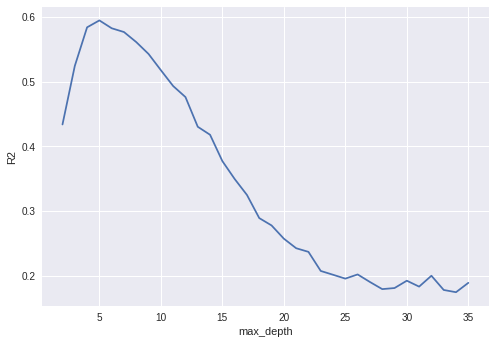

In [261]:
import matplotlib.pyplot as plt
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');

In [262]:
dec_tree_9 = DecisionTreeRegressor(max_depth = 5, random_state = 42)
dec_tree_9.fit(X_train, y_train)
train_9_score = dec_tree_9.score(X_train, y_train)
test_9_score = dec_tree_9.score(X_test, y_test)
print(train_9_score)
print(test_9_score)

0.6039349810016552
0.594715240267456
